In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

In [3]:
masked_sequence = 'AATACTAGAGGTCTTCCGACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTGTGGGCGGGAAGACAACTAGGGG'

upstream = 'AATACTAGAGGTCTTCCGAC'
downstream = 'GTGTGGGCGGGAAGACAACTAGGGG'

In [4]:
df = pd.read_csv('Data/RFP/2025_04_24.csv')
df.sort_values(by='Strain', inplace=True)
df.head()

,EC#,Strain,Sequence_infill,Sequence,Avg_OD600,Avg_GFP,Avg_RFP,Rel_RFP
6,62,Lac,TTTACACTTTATGCTTCCGGCTCGTATGTTGTGTGG,AATACTAGAGGTCTTCCGACTTTACACTTTATGCTTCCGGCTCGTA...,0.289504,481304,266700.6670,921232
9,36,OsmY,CCCGAGCGGTTTCAAAATTGTGATCTATATTTAACAAA,ATACTAGAGGTCTTCCGACCCCGAGCGGTTTCAAAATTGTGATCTA...,0.069388,1902548,126919.1670,1829128
12,37,OsmY_C12A,CCCGAGCGGTTTCAAAATTGTGATATATATTTAACAAA,TACTAGAGGTCTTCCGACCCCGAGCGGTTTCAAAATTGTGATATAT...,0.084288,2120625,221796.1670,2631408
11,35,P5,TTGACAATTAATCATCCGGCTCGTAATTTATGTGGA,AATACTAGAGGTCTTCCGACTTGACAATTAATCATCCGGCTCGTAA...,0.163669,139190,353329.6670,2158810
3,34,P533A,TTAACAATTAATCATCCGGCTCGTAATTTATGTGGA,AATACTAGAGGTCTTCCGACTTAACAATTAATCATCCGGCTCGTAA...,0.091953,446388,64155.1667,697698


In [5]:
for idx, row in df.iterrows():
    sequence = row['Sequence_infill']
    print(sequence)
    # for i in range(len(upstream)):

TTTACACTTTATGCTTCCGGCTCGTATGTTGTGTGG
CCCGAGCGGTTTCAAAATTGTGATCTATATTTAACAAA
CCCGAGCGGTTTCAAAATTGTGATATATATTTAACAAA
TTGACAATTAATCATCCGGCTCGTAATTTATGTGGA
TTAACAATTAATCATCCGGCTCGTAATTTATGTGGA
CCCCTATTTCCTATTTCTGTAGTCATAGGGTGTT
TTGACACTATTTCCTATTTCTCTTATAATTTGTGTT
AAGACGCTATTTCCTATTTCTCTTATAATTTGTGTT
TTGACAAGGAGGTTATAATTT_TAATAATAGTGTGG
TTGACAAGGAGGTTATAATTTA_AATAATAGTGTGG
CTATTCTCTTGACCCGGTTCCTTGCGTGAGGTGTGG
TAAATAGGACTGGTGCAAGCCGACGATGGCGTGTGG
TTCTCACTTCAGCAGAAGCTGTGTACACAAGTGTGG
TGACAAACCCTCTCACCCTTTATAAGTGGCGTGTGG
TTGAAATAAGGAATATATTATTTTAACATGGTGTGG
ATTTCAAACTGATACTGATATATAATTCTCGTGTGG
TTTGAAAATATATTATTGTATATATATTATGTGTGG
TTGACTTATAAAATATATTG_ATATAAACTGTGTGG
TTGACTAGGATGATATAATGTATACTTTCCGTGTGG
TTGACTTCTATATTATAT_AGATAAACTATGTGTGG
TTGACTTCTATATTATATTAG_TAAACTATGTGTGG
TTGACGGGTATATTATACTGTATACTATCAGTGTGG
TTGACAAAGAGGTTATAATTTATACTATCCGTGTGG
CGATGGTGTCAACGTAAATGCATGCCGCTGGTCTCT


In [6]:
CNN_5_0 = keras.saving.load_model('Models/CNN_5_0.keras')
CNN_5_1 = keras.saving.load_model('Models/CNN_5_1.keras')
CNN_5_6 = keras.saving.load_model('Models/CNN_5_6.keras')
CNN_6_1_2 = keras.saving.load_model('Models/CNN_6_1_2.keras')

def padded_one_hot_encode(sequence):
    mapping = {'A': [1,0,0,0], 'C': [0,1,0,0], 'G': [0,0,1,0], 'T': [0,0,0,1], '0': [0,0,0,0]}
    encoding = []
    sequence
    for nucleotide in sequence:
        encoding += [mapping[nucleotide]]
    return encoding

sequences = df['Sequence'].apply(lambda x: x.replace('_', '')).tolist()
df['CNN_5_0_Pred_RFP'] = CNN_5_0.predict(np.array([padded_one_hot_encode(seq.zfill(150)) for seq in sequences])).flatten()
df['CNN_5_1_Pred_RFP'] = CNN_5_1.predict(np.array([padded_one_hot_encode(seq.zfill(150)) for seq in sequences])).flatten()
df['CNN_5_6_Pred_RFP'] = CNN_5_6.predict(np.array([padded_one_hot_encode(seq.zfill(150)) for seq in sequences])).flatten()
df['CNN_6_1_2_Pred_RFP'] = CNN_6_1_2.predict(np.array([padded_one_hot_encode(seq.zfill(150)) for seq in sequences])).flatten()
df.head()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


,EC#,Strain,Sequence_infill,Sequence,Avg_OD600,Avg_GFP,Avg_RFP,Rel_RFP,CNN_5_0_Pred_RFP,CNN_5_1_Pred_RFP,CNN_5_6_Pred_RFP,CNN_6_1_2_Pred_RFP
6,62,Lac,TTTACACTTTATGCTTCCGGCTCGTATGTTGTGTGG,AATACTAGAGGTCTTCCGACTTTACACTTTATGCTTCCGGCTCGTA...,0.289504,481304,266700.6670,921232,0.525352,0.377289,0.240220,0.337836
9,36,OsmY,CCCGAGCGGTTTCAAAATTGTGATCTATATTTAACAAA,ATACTAGAGGTCTTCCGACCCCGAGCGGTTTCAAAATTGTGATCTA...,0.069388,1902548,126919.1670,1829128,0.660137,0.435567,0.356605,0.409059
12,37,OsmY_C12A,CCCGAGCGGTTTCAAAATTGTGATATATATTTAACAAA,TACTAGAGGTCTTCCGACCCCGAGCGGTTTCAAAATTGTGATATAT...,0.084288,2120625,221796.1670,2631408,0.623739,0.466926,0.328465,0.397303
11,35,P5,TTGACAATTAATCATCCGGCTCGTAATTTATGTGGA,AATACTAGAGGTCTTCCGACTTGACAATTAATCATCCGGCTCGTAA...,0.163669,139190,353329.6670,2158810,0.527534,0.465429,0.401412,0.471274
3,34,P533A,TTAACAATTAATCATCCGGCTCGTAATTTATGTGGA,AATACTAGAGGTCTTCCGACTTAACAATTAATCATCCGGCTCGTAA...,0.091953,446388,64155.1667,697698,0.684294,0.438758,0.351393,0.379630


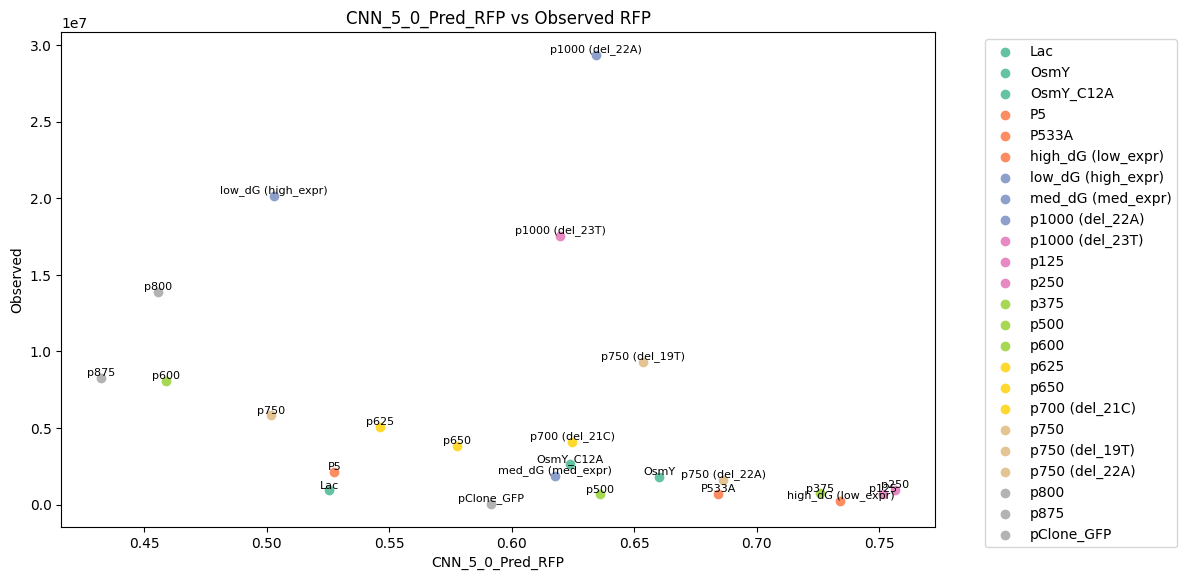

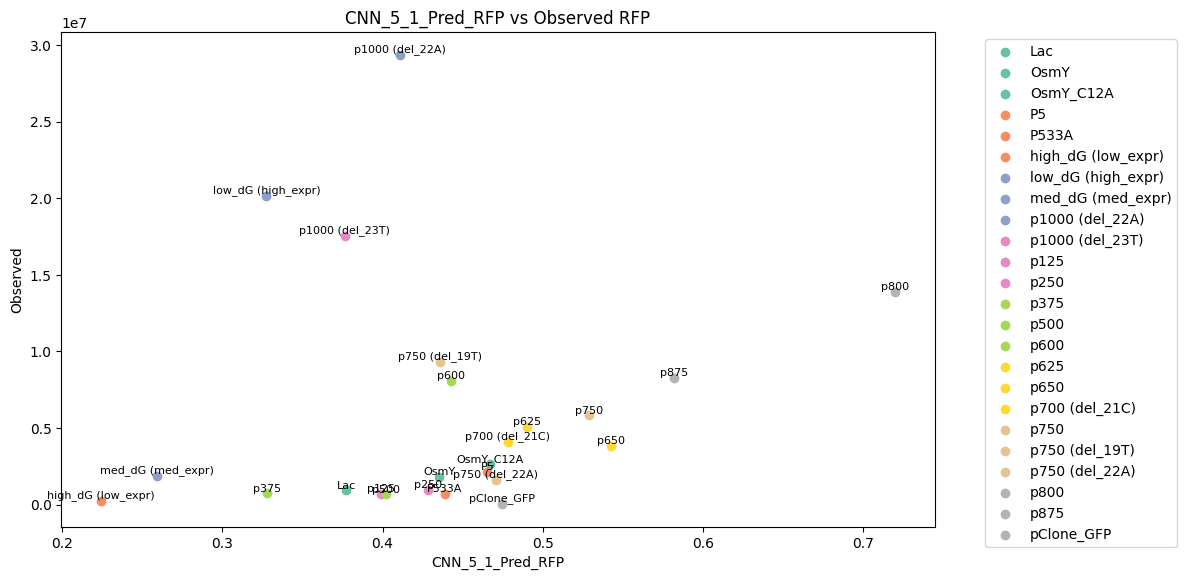

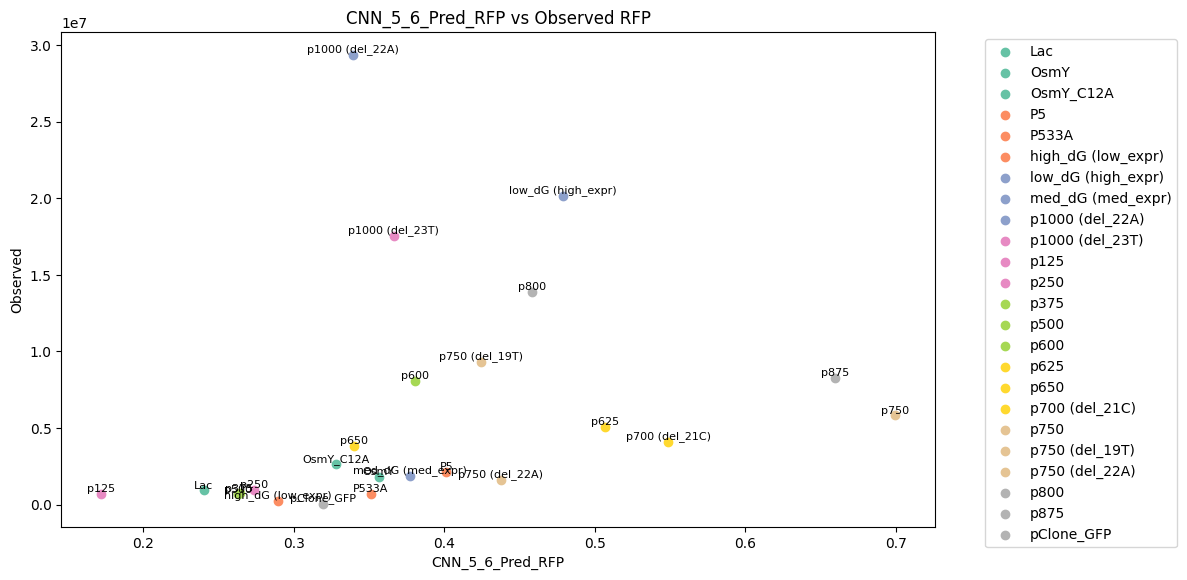

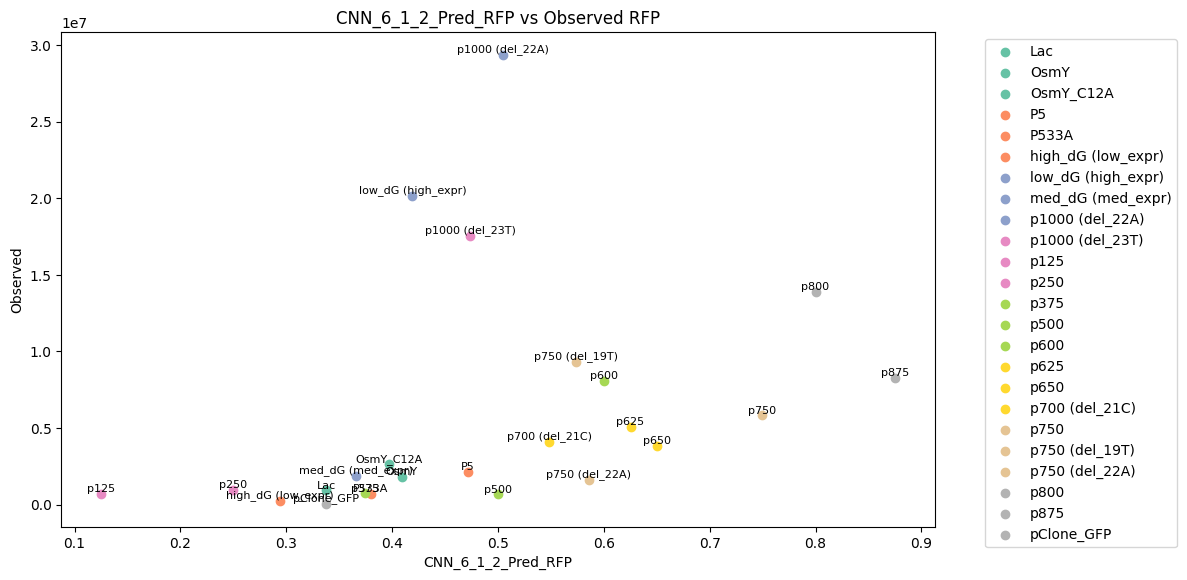

In [7]:
unique_promoters = df['Strain'].unique()
colors = plt.cm.Set2(np.linspace(0, 1, len(unique_promoters)))
color_map = {promoter: colors[i] for i, promoter in enumerate(unique_promoters)}

for predictions in ['CNN_5_0_Pred_RFP', 'CNN_5_1_Pred_RFP', 'CNN_5_6_Pred_RFP', 'CNN_6_1_2_Pred_RFP']:
    plt.figure(figsize=(12, 6))

    for promoter in unique_promoters:
        subset = df[df['Strain'] == promoter]
        color = color_map[promoter]
        plt.scatter(subset[predictions], subset['Rel_RFP'], c=[color], label=promoter)

    plt.xlabel(predictions)
    plt.ylabel('Observed')
    plt.title(f'{predictions} vs Observed RFP')

    for row in df.iterrows():
        plt.text(row[1][predictions], row[1]['Rel_RFP'], row[1]['Strain'], fontsize=8, ha='center', va='bottom')

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

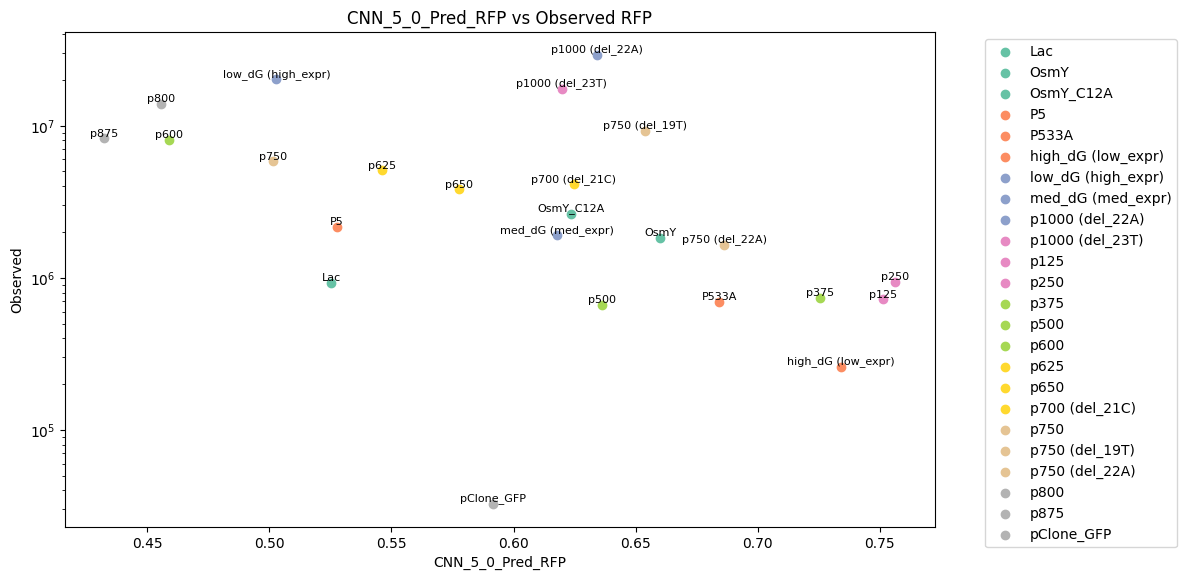

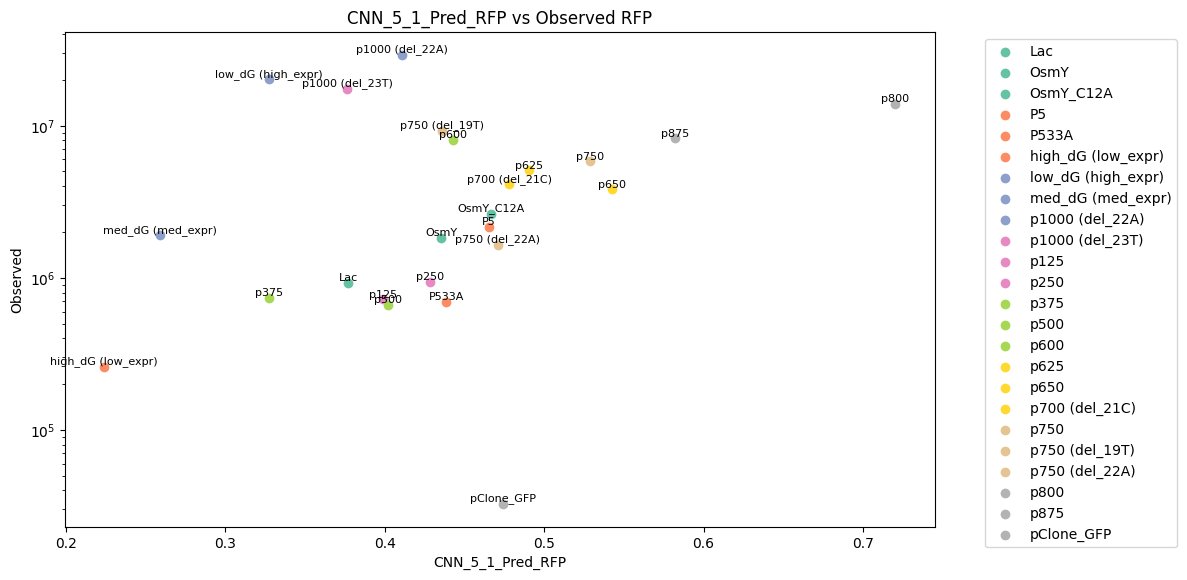

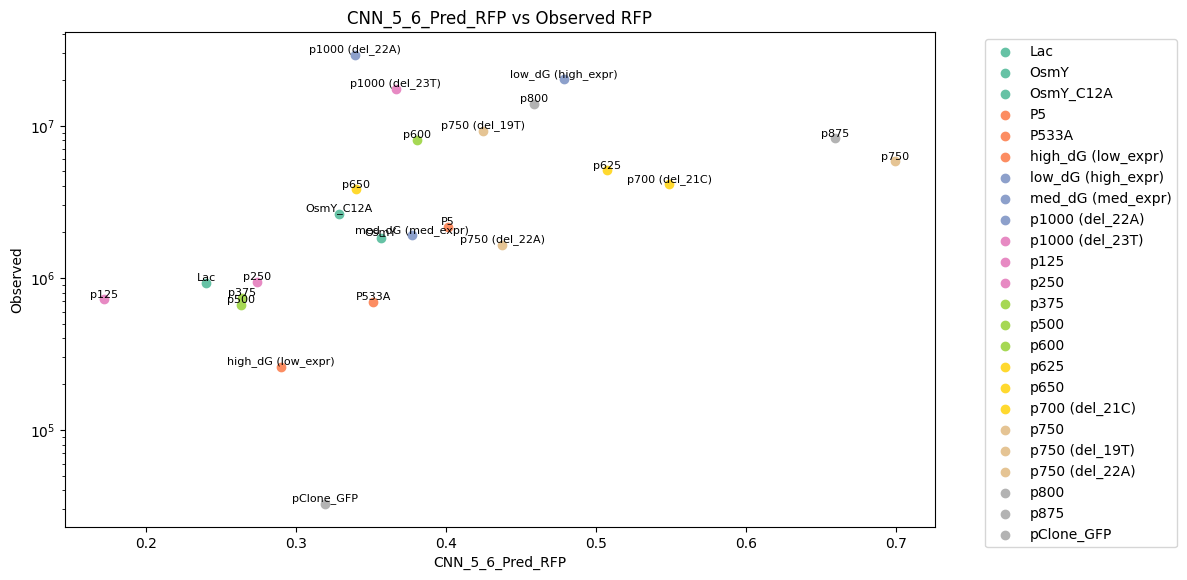

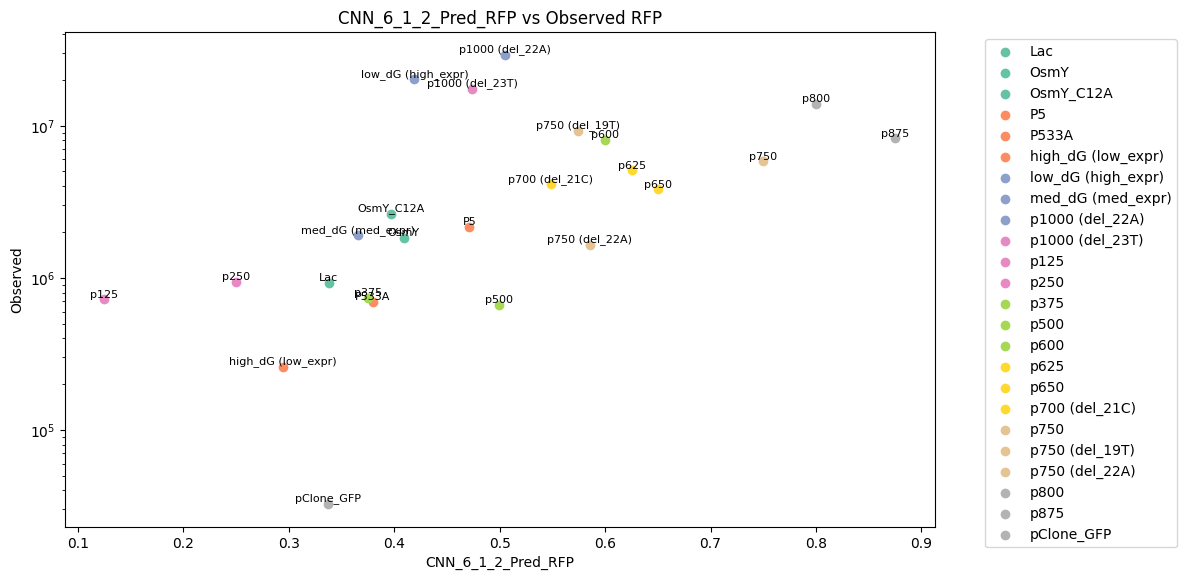

In [8]:
unique_promoters = df['Strain'].unique()
colors = plt.cm.Set2(np.linspace(0, 1, len(unique_promoters)))
color_map = {promoter: colors[i] for i, promoter in enumerate(unique_promoters)}

for predictions in ['CNN_5_0_Pred_RFP', 'CNN_5_1_Pred_RFP', 'CNN_5_6_Pred_RFP', 'CNN_6_1_2_Pred_RFP']:
    plt.figure(figsize=(12, 6))

    for promoter in unique_promoters:
        subset = df[df['Strain'] == promoter]
        color = color_map[promoter]
        plt.scatter(subset[predictions], subset['Rel_RFP'], c=[color], label=promoter)

    plt.xlabel(predictions)
    plt.ylabel('Observed')
    plt.title(f'{predictions} vs Observed RFP')

    for row in df.iterrows():
        plt.text(row[1][predictions], row[1]['Rel_RFP'], row[1]['Strain'], fontsize=8, ha='center', va='bottom')

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.yscale('log')
    plt.tight_layout()
    plt.show()